# Project 3: CRISP-DM Capston: 
## MSDS 7331 Data Mining Section 404
## 8/13/2017

### Chris Irwin, Damon Resnick, Josh Klein, Anna Frowein

## Introduction

In this project, we run clustering analyses on the Kaggle Zillow data set "Zillow Prize: Zillow’s Home Value Prediction (Zestimate)" that we used in the previous projects and labs. We look to do this by using PCA to find the most important columns then run multiple clustering algorithms. Using clustering we find an interesting relationship between the number of bedrooms total square footage of a home.

Additionally, a collaborative filtering algorithm is also used to build a short custom recommendation system.  


## Business Understanding
                        
Purchasing a home is one of the largest purchases individuals will generally make in their lifetime, understanding the value of the home is an important step in the process of purchasing or selling a house. Zillow, an online real-estate database allows for consumers to research estimated market values in the different areas. The estimated market value is calculated daily using public housing information and user inputted data in the calculation, Zillow calls this estimate a “Zestimate.” While Zestimates are not available in all areas, Zillow has released that since their launch the median margin of error has improved from 14% to approximately 5.5%. The timeline of the Kaggle competition does not lend itself for us to use the competition goals as a marker of successful prediction. With this in mind, we believe that the ‘taxamount’ lends itself as the best representation of the “Zestimate” for us to predict and base the success of the algorithms used to analyze it.

        
## Data Understanding

### Part 1
       
Specifically, the dataset used is a merged set of properties_2016.csv and train_2016.cvs from the Zillow Prize: Zillow's Home Value Prediction (Zestimate) Kaggle competition.  The dataset contains all properties from Los Angeles County, Orange County, and Ventura County in California, along with the home features for 2016. The data is provided by Zillow with what was gathered through public records and through user entered data points. 

The data set from Kaggle has 58 variables describing the different features or characteristics of a home, including number of bedrooms, location detail, square footage, number of bathrooms, type of heating/cooling systems, ect. The following table has the list of attributes and their descriptions as provided by Zillow in their data dictionary, found on Kaggle.  

|Feature                      |Description                                                                          |
|-----------------------------|-------------------------------------------------------------------------------------|
|'airconditioningtypeid'      |Type of cooling system present in the home (if any)                                  |
|'architecturalstyletypeid'   |Architectural style of the home (i.e. ranch, colonial, split-level, etc…)            |
|'basementsqft'	              |Finished living area below or partially below ground level                           |
|'bathroomcnt'	              | Number of bathrooms in home including fractional bathrooms                          |
|'bedroomcnt'	              |Number of bedrooms in home                                                           |
|'buildingqualitytypeid'      |Overall assessment of condition of the building from best (lowest) to worst(highest) |
|'buildingclasstypeid'	      |The building framing type (steel frame, wood frame, concrete/brick)                  |
|'calculatedbathnbr'	      |Number of bathrooms in home including fractional bathroom                            |
|'decktypeid'	              |Type of deck (if any) present on parcel                                              |
|'threequarterbathnbr'	      |Number of 3/4 bathrooms in house (shower + sink + toilet)                            |
|'finishedfloor1squarefeet'   |Size of the finished living area on the first (entry) floor of the home              |
|'calculatedfinishedsquarefeet|Calculated total finished living area of the home                                    |
|'finishedsquarefeet6'	      |Base unfinished and finished area                                                    |
|'finishedsquarefeet12'	      |Finished living area                                                                 |
|'finishedsquarefeet13'	      |Perimeter  living area                                                               |
|'finishedsquarefeet15'	      |Total area                                                                           |
|'finishedsquarefeet50'	      |Size of the finished living area on the first (entry) floor of the home              |
|'fips'	                      |Federal Information Processing Standard                                              |
|-----------------------------|code-see https://en.wikipedia.org/wiki/FIPS_county_code                              |
|'fireplacecnt'	              |Number of fireplaces in a home (if any)                                              |
|'fireplaceflag'	          |Is a fireplace present in this home                                                  |
|'fullbathcnt'	              |Number of full bathrooms (sink, shower + bathtub, and toilet) present in home        |
|'garagecarcnt'	              |Total number of garages on the lot including an attached garage                      |
|'garagetotalsqft'	          |Total number of square feet of all garages on lot including an attached garage       |
|'hashottuborspa'	          |Does the home have a hot tub or spa                                                  |
|'heatingorsystemtypeid'	  |Type of home heating system                                                          |
|'latitude'	                  |Latitude of the middle of the parcel multiplied by 10e6                              |
|'longitude'	              |Longitude of the middle of the parcel multiplied by 10e6                             |
|'lotsizesquarefeet'	      |Area of the lot in square feet                                                       |
|'numberofstories'	          |Number of stories or levels the home has                                             |
|'parcelid'	                  |Unique identifier for parcels (lots)                                                 |
|'poolcnt'	                  |Number of pools on the lot (if any)                                                  |
|'poolsizesum'	              |Total square footage of all pools on property                                        |
|'pooltypeid10'	              |Spa or Hot Tub                                                                       |
|'pooltypeid2'	              |Pool with Spa/Hot Tub                                                                |
|'pooltypeid7'	              |Pool without hot tub                                                                 |
|'propertycountylandusecode'  |County land use code i.e. it's zoning at the county level                            |
|'propertylandusetypeid'	  |Type of land use the property is zoned for                                           |
|'propertyzoningdesc'	      |Description of the allowed land uses (zoning) for that property                      |
|'rawcensustractandblock'	  |Census tract and block ID combined-also contains blockgroup assignment by extension  |
|'censustractandblock'	      |Census tract and block ID combined - also contains blockgroup assignment by extension|
|'regionidcounty'	          |County in which the property is located                                              |
|'regionidcity'	              |City in which the property is located (if any)                                       |
|'regionidzip'	              |Zip code in which the property is located                                            |
|'regionidneighborhood'	      |Neighborhood in which the property is located                                        |
|'roomcnt'	                  |Total number of rooms in the principal residence                                     |
|'storytypeid'	              |Type of floors in a multi-story house                                                |
|-----------------------------|(i.e. basement and main level, split-level, attic, etc.).  See tab for details.      |
|'typeconstructiontypeid'	  |What type of construction material was used to construct the home                    |
|'unitcnt'	                  |Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)   |
|'yardbuildingsqft17'	      |Patio in  yard                                                                       |
|'yardbuildingsqft26'	      |Storage shed/building in yard                                                        |
|'yearbuilt'	              |The Year the principal residence was built                                           |
|'taxvaluedollarcnt'	      |The total tax assessed value of the parcel                                           |
|'structuretaxvaluedollarcnt' |The assessed value of the built structure on the parcel                              |
|'landtaxvaluedollarcnt'	  |The assessed value of the land area of the parcel                                    |
|'taxamount'	              |The total property tax assessed for that assessment year                             |
|'assessmentyear'	          |The year of the property tax assessment                                              |
|'taxdelinquencyflag'	      |Property taxes for this parcel are past due as of 2015                               |
|'taxdelinquencyyear'	      |Year for which the unpaid property taxes were due                                    |
 

In [2]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#LinearRegression 
from sklearn.linear_model import LinearRegression

#Allows for meterics to be found after Logistic Regression
from sklearn import metrics as mt

#Create KFolds for CV_Object
from sklearn.model_selection import StratifiedKFold

#Creates Standard Scaler Variables
from sklearn.preprocessing import StandardScaler

#Support Vector Machine
from sklearn.svm import SVC

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
#dfAttributeData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') 
#dfAttributeData = pd.read_csv('/Users/joshuaklein/Desktop/properties_2016.csv')
dfAttributeData = pd.read_csv('C:/Users/hp/Desktop/SMU/Data Mining/Project/Data/Properties_2016.csv') 

dfTrainingData = pd.read_csv('C:/Users/hp/Desktop/SMU/Data Mining/Project/Data/train_2016.csv')
#dfTrainingData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/train_2016.csv')
#dfTrainingData = pd.read_csv('/Users/joshuaklein/Desktop/train_2016_v2.csv')

#Create new data set that contains both the data zillow and the data to train against
dfZillowData = pd.merge(dfTrainingData, dfAttributeData, on='parcelid', how='left')

#Remove 2.9 million records from memory
del dfAttributeData


#Get the headers to ensure all columns are included.
dfZillowData.head(10)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.0843,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13


In [3]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns with highest missing values as True/False.
#print(dfMajorityOfDataMissing)

dfZillowData['hasbasement'] = dfZillowData[['basementsqft']].where(dfZillowData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasdeck'] = dfZillowData[['yardbuildingsqft26']].where(dfZillowData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasfireplace'] = dfZillowData[['fireplaceflag']].where(dfZillowData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hashottuborspa'] = dfZillowData[['hashottuborspa', 'pooltypeid2', 'pooltypeid10']].where(dfZillowData[['hashottuborspa','pooltypeid2','pooltypeid10']].isnull(), 1).fillna(0).astype(int)

dfZillowData['haspatio'] = dfZillowData[['yardbuildingsqft17']].where(dfZillowData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)

#Create Function for County Rename
def rename(row):
    if row['regionidcounty'] == 1286:
        val = 'Ventura County'
    elif row['regionidcounty'] == 3101:
        val = 'Los Angeles County'
    else:
        val = 'Orange County'
    return val

dfZillowData['countyname'] = dfZillowData.apply(rename, axis=1)

#Need to transform Tax Value because of large outliers
dfZillowData['log10TaxValue'] = np.log10(dfZillowData['taxvaluedollarcnt'])

#Create New data frame for everything
dfForModel = dfZillowData.replace(to_replace='NaN',value= np.nan)

#Get median values for based on original values
dfMedians = pd.DataFrame(dfZillowData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))
#Second Row #,0.#,'garagecarcnt'
#Set Column Name
dfColumns.columns = ['updatevalue']

#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))
#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#storytypeid
dummies = pd.get_dummies(dfForModel['storytypeid']).rename(columns=lambda x: 'StoryTypeId' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['storytypeid'], inplace=True, axis=1)

#Create Function for County Rename
def garagecnt(row):
    if row['garagecarcnt'] > 0:
        val = 1
    else:
        val = 0
    return val

dfForModel['hasgarage'] = dfForModel.apply(garagecnt, axis=1)

#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64','uint8'])

dfZillowDataNumeric.head(10)

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,LandUseTypeId_263.0,LandUseTypeId_264.0,LandUseTypeId_265.0,LandUseTypeId_266.0,LandUseTypeId_267.0,LandUseTypeId_269.0,LandUseTypeId_275.0,StoryTypeId7.0,StoryTypeId24.0,hasgarage
0,11016594,0.0276,1.0,7.0,0.0,2.0,3.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,14366692,-0.1684,5.0,7.0,0.0,3.5,4.0,4.0,7.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,12098116,-0.0040,1.0,7.0,0.0,3.0,2.0,4.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,12643413,0.0218,1.0,7.0,0.0,2.0,2.0,4.0,4.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,14432541,-0.0050,5.0,7.0,0.0,2.5,4.0,4.0,7.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,11509835,-0.2705,1.0,7.0,0.0,4.0,4.0,4.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,12286022,0.0440,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
7,17177301,0.1638,5.0,7.0,0.0,2.5,3.0,4.0,7.0,2.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
8,14739064,-0.0030,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
9,14677559,0.0843,5.0,7.0,0.0,2.0,2.0,4.0,7.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


### Data Understanding - Part 2

### Visualize Attributes

The first attributes we reviewed were related to the location of the houses in the data set.  *A Pie chart was created to show the total number of properties by county, from the pie chart we can see that LA County has the highest total number of houses within the data set.*  We also used latitude and longitude to create the below map with the housing locations and color coded by county.  The map below shows the majority of the houses are found in LA County (Blue shaded area).  The clustering or grouping of houses within their counties is important as we can use this information to understand the tax evaluations and taxes paid as each county would be responsible for the evaluations each year.  

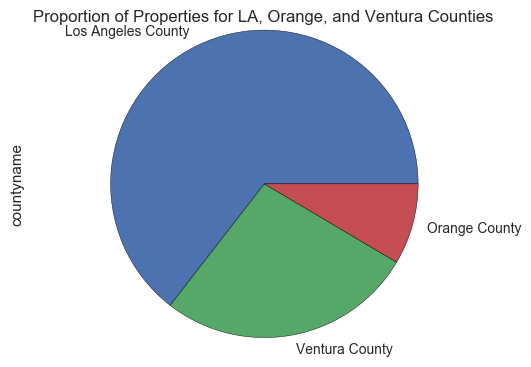

In [4]:
#Pie chart of Houses by county
dfDataForPieChart = dfForModel[['countyname']]
dfDataForPieChart.countyname.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Proportion of Properties for LA, Orange, and Ventura Counties')

Next, we reviewed the finished squared footage and lot square footage attributes. These attributes are important to review since generally properties will be priced by squared footage in order to provide a comparison. With both attributes, the range is so widely distributed that we decided to also review the log of both the attributes as a way to normalize and more concisely review the data. We used a histogram because of its ability to best show both the original distribution as well as the newly created log distribution on a side by side basis. After reviewing the histograms created by the data set the distributions appear to be Gaussian on the log scale, which are centered around an average value.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


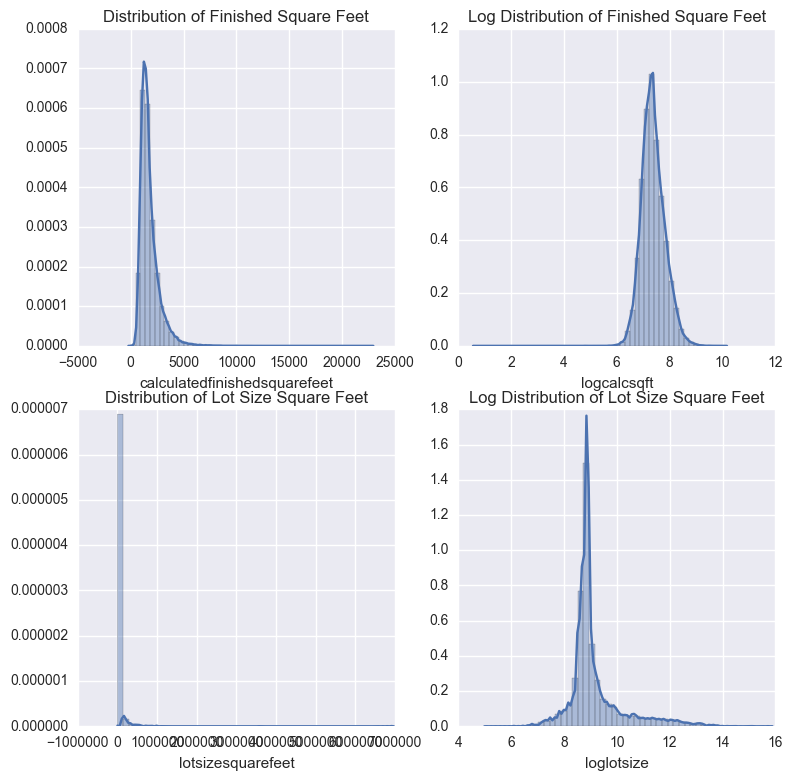

In [5]:
dfDataForHistograms = dfForModel[['calculatedfinishedsquarefeet', 'yearbuilt', 'bedroomcnt', 'lotsizesquarefeet']]

f, ax = plt.subplots(figsize=(9, 9))

plt.subplot(2,2,1)
sb.distplot(dfDataForHistograms['calculatedfinishedsquarefeet'])
plt.title('Distribution of Finished Square Feet')

#Create log transformation
dfDataForHistograms['logcalcsqft'] = np.log(dfDataForHistograms['calculatedfinishedsquarefeet'])
plt.subplot(2,2,2)
sb.distplot(dfDataForHistograms['logcalcsqft'])
plt.title('Log Distribution of Finished Square Feet')

plt.subplot(2,2,3)
sb.distplot(dfDataForHistograms['lotsizesquarefeet'])
plt.title('Distribution of Lot Size Square Feet')

dfDataForHistograms['loglotsize'] = np.log(dfDataForHistograms['lotsizesquarefeet'])

plt.subplot(2,2,4)
sb.distplot(dfDataForHistograms['loglotsize'])
plt.title('Log Distribution of Lot Size Square Feet')

Next we reviewed the count of bedrooms and the year built of the houses in the data set. The overall number of bedrooms is an important attribute to review when evaluating houses, as different demographics would want different bedroom counts. We can use this information later to possibly review where these houses are in relationship to other attributes that could increase or decrease the value of a house. For example, a studio or zero bedroom property may be priced more than a three bedroom property due to its location. Based on the bar chart below we see that the most common bedroom count in the data set is 3. We chose a bar chart to accurately represent the count of bed rooms opposed to a histogram that shows the overall distribution.
The histogram for year built indicates a multimodal distribution, in approximately the 1950s and 1970s. Additionally, we see very few houses built prior to 1900. A histogram was used in order to show the overall distribution of homes built for the time period given to us in the dataset.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


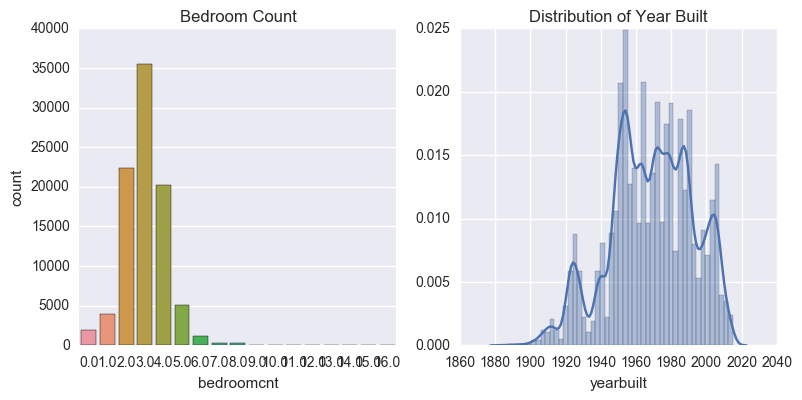

In [6]:
f, ax = plt.subplots(figsize=(9, 9))

plt.subplot(2,2,1)
sb.countplot(dfDataForHistograms['bedroomcnt'])
plt.title('Bedroom Count')

plt.subplot(2,2,2)
sb.distplot(dfDataForHistograms['yearbuilt'])
plt.title('Distribution of Year Built')

We reviewed the average square footage as compared to the year the home was built. We see that some of the larger homes were built prior to when California became a state. This could be from lack of accurate records for when houses were built and possible additions built onto the older houses. After about 1875 we see the variability in the square footage by year decreasing and we see that the average drops until about 1950 when we start to see steady increase in the square footage of house built.

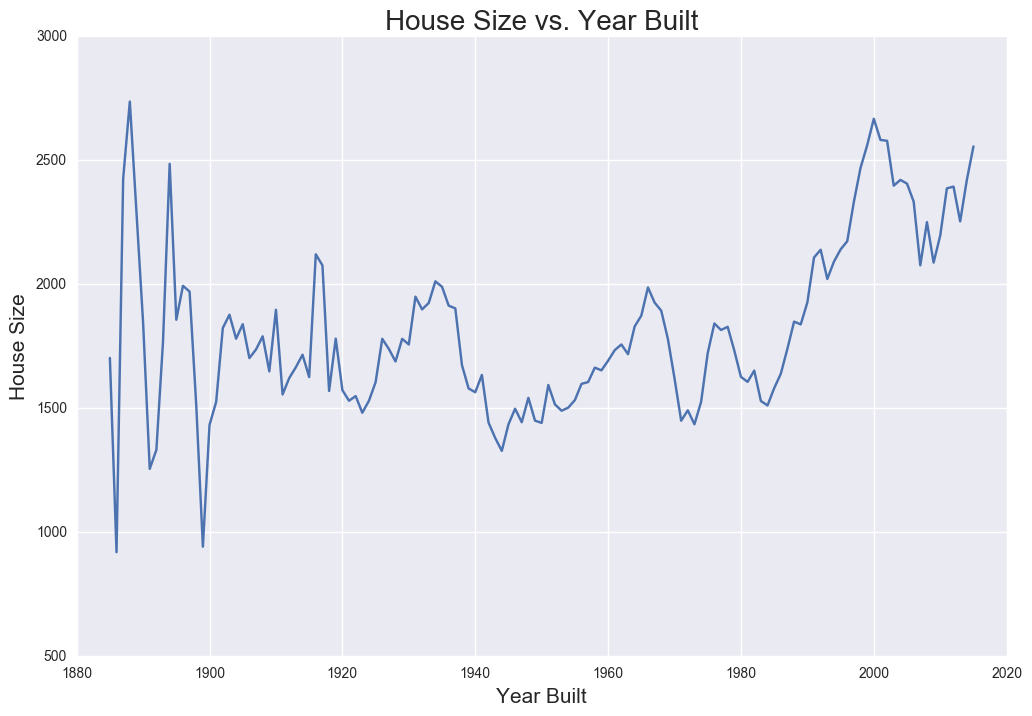

In [7]:
dfForModel2=dfForModel[['calculatedfinishedsquarefeet','yearbuilt']]
dfAverage = dfForModel2.groupby(by='yearbuilt').mean()
#dfAverage = dfForModel.groupby(by='yearbuilt')['calculatedfinishedsquarefeet'].agg('mean')
plt.figure(figsize=(12,8))
plt.plot(dfAverage)
plt.title('House Size vs. Year Built', size=20)
plt.ylabel('House Size', size=15)
plt.xlabel('Year Built', size=15)
plt.show()

## Modeling and Evaluation

Preperation for modeling and evalutation:

In [8]:
#Create data set that has all original values from the file.
#Every Zillow value with a real garage car count
dfTrainValues = dfZillowData[['parcelid']][~(dfZillowData['garagecarcnt'].isnull())]

#Get values for dfForModel 
dfTrainValues = pd.merge(dfTrainValues, dfForModel, on='parcelid', how='left')

#Create Numeric Dataframe only for PCA and Classification.
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfTrainValues)

#Create Numeric Only Dataframe
dfTrainValuesNumeric = dfDataTypes.select_dtypes(['float64','int64','uint8'])

#Number of iterations
num_cv_iterations = 5
#Create Cross Validation objects using folds
cv_object = StratifiedKFold(n_splits=num_cv_iterations, random_state=None, shuffle=True)

print('Cross Validation Object is created')

Cross Validation Object is created


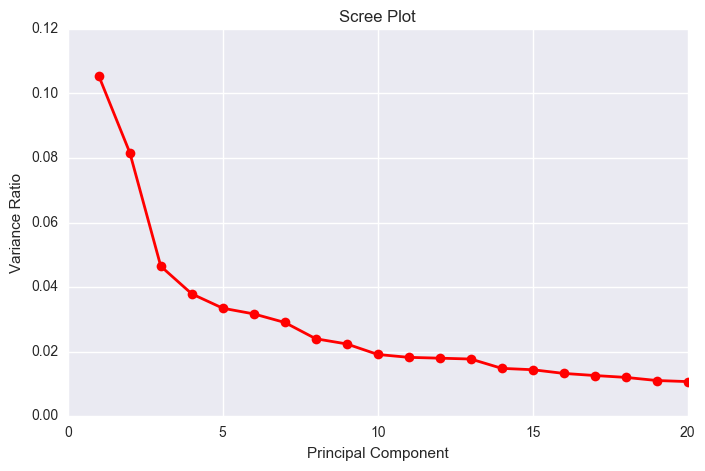

In [9]:
ZillowDataPCA = dfZillowDataNumeric

#This section scales the data in order to create a more useable data set
# scale attributes by the training set
stdsclrObj = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
# find scalings for each column that make this zero mean and unit std
stdsclrObj.fit(ZillowDataPCA) 

# to transform new feature data
# apply to training
ZillowData_scaled = stdsclrObj.transform(ZillowDataPCA)

components = 20

pca = PCA(n_components= components)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowData_scaled).transform(ZillowData_scaled) # fit data and then transform it

variance_ratio = pca.explained_variance_ratio_

fig = plt.figure(figsize=(8,5))
#Create 
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, variance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

## Column Selection
Using PCA we see that while looking at the first 15 Principal Components we use an absolute value of .05 in order to see which columns are considered to be most important. This is important for us to be able to remove a large amount of noise due to the dataset having a total of 114 columns. After the analysis, we can see that the number of columns is reduced to only 26, which we will try different types of Clustering to try and get a deeper understanding of the data.

In [10]:

import sklearn.datasets as ds

pca_components = pca.components_

compValues = pd.DataFrame(pca_components,columns=ZillowDataPCA.columns)

#show top 13 vectors due to the analysis 
compValues = compValues[compValues.index <= 15]

compValuesTransformed = compValues.T

ColumnsAndValues = []

dfColumns = pd.DataFrame([])

for compValue in compValuesTransformed:
    i = 0 
    ColumnsAndValues = compValuesTransformed[i].loc[abs(compValuesTransformed[i]) > .05]
    for columns in ColumnsAndValues.index:
        if columns != 'parcelid':
            dfColumns = dfColumns.append([columns])
            #print columns
    i = i + 1

dfClustering = pd.DataFrame([])

#Reset Index from removing data
dfColumns = dfColumns.drop_duplicates([0], keep='last').reset_index(drop=True)

for columnNames in dfColumns[0]:
    dataValues = dfZillowDataNumeric[[columnNames]]
    dfClustering[columnNames] = pd.DataFrame(dataValues, index=dataValues.index)
    #dfClustering[columnNames] = dfClustering.add(dfZillowDataNumeric[[columnNames][0]])

print(len(dfClustering.columns))
print(dfClustering.columns)


26
Index(['airconditioningtypeid', 'buildingqualitytypeid',
       'finishedfloor1squarefeet', 'finishedsquarefeet50', 'fips',
       'fireplacecnt', 'fullbathcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'lotsizesquarefeet',
       'rawcensustractandblock', 'regionidcounty', 'roomcnt', 'unitcnt',
       'numberofstories', 'censustractandblock', 'HSTypeId_2.0',
       'HSTypeId_13.0', 'ACTypeId_1.0', 'ACTypeId_5.0', 'ACTypeId_13.0',
       'BuildingQualTypeId_1.0', 'BuildingQualTypeId_4.0',
       'BuildingQualTypeId_7.0', 'LandUseTypeId_269.0'],
      dtype='object')


## Creating Clustering 
After creating a new clustering data set with what is considered the most important columns according to PCA we can now begin the process of running multiple clustering functions. This is showing that we are trying to predict the values of Region by using Full Bath Count and Room count. We are using random forests to create a baseline value to compare against. Additionally, we choose 3 groupings because in the data set there are 3 distinct counties in which properties can be found.

In [11]:
#Creating Baseline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

groupingCnt = 3

y = dfClustering['regionidcounty']

X = dfClustering[['finishedfloor1squarefeet','fullbathcnt','roomcnt']]

rFCLF = RandomForestClassifier(n_estimators=groupingCnt,random_state=1)

acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  87.6953239269 +- 0.145342637078


We can see that by using the most common attributes when home buying Finished Square feet, bath count and room count we have a base line accuracy of 87.69% when attempting to predict one of the three counties that this data set might contain.

In [12]:
#Creating Baseline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

groupingCnt = 3

y = dfClustering['regionidcounty']

X = dfClustering[['finishedfloor1squarefeet','roomcnt']]

rFCLF = RandomForestClassifier(n_estimators=groupingCnt,random_state=1)

acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  87.6997321233 +- 0.204728153886


In taking a deeper look at the data we wondered what type of effect full bath count on the accuracy. Below we can see that by removing the full bath count variable there is actually a very small increase in accuracy, but there is also a very small increase in variance. We felt that the increase in variance was not enough to truly affect the outcome and choose to remove the variables for the remainder of the analysis. Below you can see a scatter plot that shows the values of finished square footage versus home room count. In order to help with creating a better view we added some addition randomization in order to allow the clustering to better show. The differences can be seen between the two graphs below. The original graph on the right versus the left, which has had random noise added to the points.  

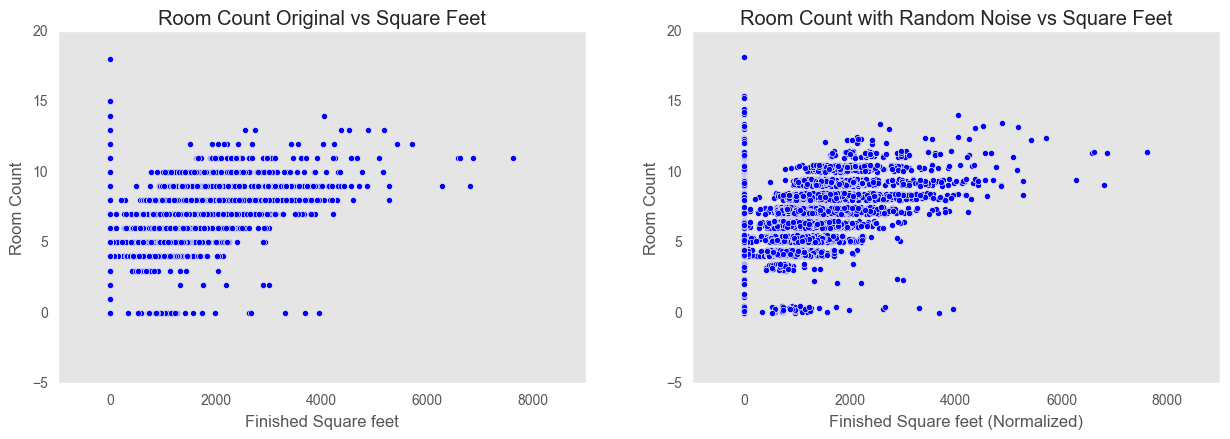

In [15]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X1 = dfClustering[['roomcnt','finishedfloor1squarefeet']].values



f, ax = plt.subplots(figsize=(15, 10))

f.title = plt.title("Initialization and Clustering Effect on Std Dev")

plt.subplot(2,2,1)
plt.scatter(X1[:, 1], X1[:, 0], s=20)
plt.xlabel('Finished Square feet'), plt.ylabel('Room Count')
plt.grid()
plt.title('Room Count Original vs Square Feet')

plt.subplot(2,2,2)
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, s=20)
plt.xlabel('Finished Square feet (Normalized)'), plt.ylabel('Room Count')
plt.grid()
plt.title('Room Count with Random Noise vs Square Feet')
plt.show()


Below we run KMeans clustering multiple times in order to see what combination of cluster count and which initialization would create the best accuracy. We randomly chose between 3 and 10 clusters, but were limited to two methods of initialization, which are K-means++ and Random.  

The k-means method is a widely used clustering technique that seeks to minimize the average squared distance between points in the same cluster. Although it offers no accuracy guarantees, its simplicity and speed are very appealing in practice.

In the python function KMeans the 'k-means++' option is used. This means that the K-means++ algorithm is used to help choose the initial centers in a way that is not simply random but by first spreading the initial centers more evenly by first choosing an initial center random ly then choosing a second center based on the first instead of just randomly. It has been shown that the K-means++ algorithm tends to work more quickly with better performance than the Random algorithm and generally gives similar results.


In [14]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

dfKmeansValues = pd.DataFrame(columns=('init', 'groupingCnt', 'accuracy', 'StdDev'))

for init in ('random', 'k-means++'):
    for groupingCnt in range(3,11):
        cls = KMeans(n_clusters=groupingCnt, init=init,random_state=1)
        cls.fit(X1)
        newfeature = cls.labels_ # the labels from kmeans clustering
        
        acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)
        
        dfKmeansValues = dfKmeansValues.append(pd.DataFrame({'init': init
                                                            ,'groupingCnt':groupingCnt
                                                            ,'accuracy':acc.mean()*100
                                                            ,'StdDev':acc.std()*100}, index=[0]), ignore_index=True)   

        print ("Average accuracy (with ", init," and ", groupingCnt , "number of clusters for finished Sqft/Bedrooms)= ", acc.mean()*100, "+-", acc.std()*100)
        
print('Values Created')      

Average accuracy (with  random  and  3 number of clusters for finished Sqft/Bedrooms)=  87.6997291525 +- 0.162949716295
Average accuracy (with  random  and  4 number of clusters for finished Sqft/Bedrooms)=  87.6975243874 +- 0.114285952044
Average accuracy (with  random  and  5 number of clusters for finished Sqft/Bedrooms)=  87.6975248118 +- 0.129700854881
Average accuracy (with  random  and  6 number of clusters for finished Sqft/Bedrooms)=  87.6964231871 +- 0.0659909391686
Average accuracy (with  random  and  7 number of clusters for finished Sqft/Bedrooms)=  87.6997249691 +- 0.22224115699
Average accuracy (with  random  and  8 number of clusters for finished Sqft/Bedrooms)=  87.6986350458 +- 0.398410663883
Average accuracy (with  random  and  9 number of clusters for finished Sqft/Bedrooms)=  87.6975252968 +- 0.221428045931
Average accuracy (with  random  and  10 number of clusters for finished Sqft/Bedrooms)=  87.6997237565 +- 0.324608481022
Average accuracy (with  k-means++  and 

# Additional Parameters

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


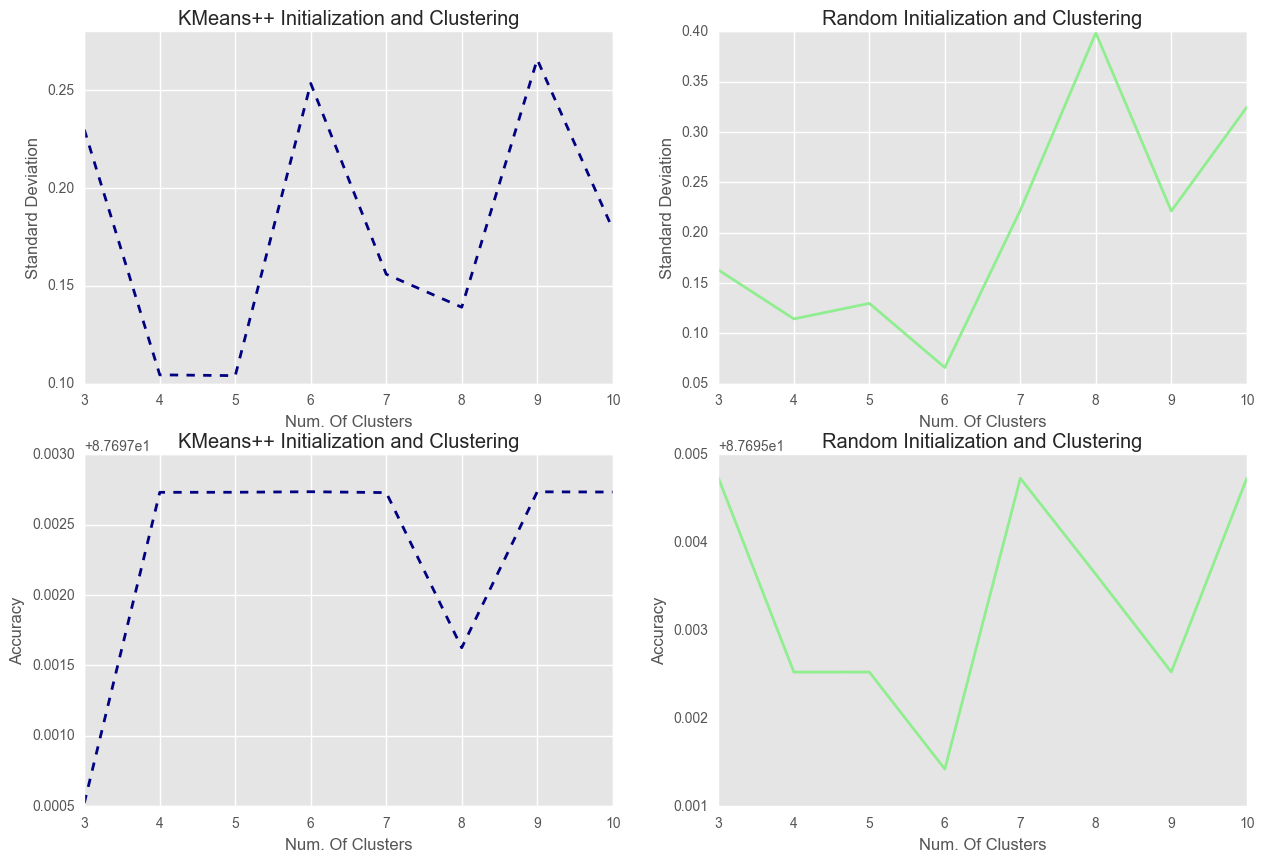

In [16]:
#Craete Random DataFrame
dfKmeansRandomValues = dfKmeansValues.loc[dfKmeansValues['init'] == 'random']

#Create Kmean++ Dataframe
dfKmeansPlusValues = dfKmeansValues.loc[dfKmeansValues['init'] == 'k-means++']

#Create Graphs

f, ax = plt.subplots(figsize=(15, 10))

f.title = plt.title("Initialization and Clustering Effect on Std Dev")

plt.subplot(2,2,1)
plt.ylabel('Standard Deviation')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('KMeans++ Initialization and Clustering')
plt.plot(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.StdDev, '--', color='navy', linewidth=2,label='KMeans++')
for xy in zip(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.StdDev):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')


plt.subplot(2,2,2)
plt.ylabel('Standard Deviation')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('Random Initialization and Clustering')
plt.plot(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.StdDev, color='lightgreen', linewidth=2,label='Random')
for xy in zip(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.StdDev):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
    
plt.subplot(2,2,3)
plt.ylabel('Accuracy')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('KMeans++ Initialization and Clustering')
plt.plot(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.accuracy, '--', color='navy', linewidth=2,label='KMeans++')
for xy in zip(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.accuracy):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')


plt.subplot(2,2,4)
plt.ylabel('Accuracy')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('Random Initialization and Clustering')
plt.plot(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.accuracy, color='lightgreen', linewidth=2,label='Random')
for xy in zip(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.accuracy):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
    
plt.grid()
plt.show()




## What should we use?
It looks like based on graphs above that an initialization value of Random gives us a more consistent accuracy across multiple clusters with differences in standard deviation. Also based on a combination of accuracy and standard deviation we found that 8 clusters were the best overall performer.  

## Additional Attributes
In looking at other attributes that could help improve the accuracy of our Random clustering we found that we could try different algorithms when creating clusters. In turn, we completed an additional experiment using 8 clusters and random initialization to see if using one of the three different algorithms available to us created a better overall accuracy. 

The three algorithms are "auto", "full", and "elkan". "Auto" is the default and "auto" chooses either the classical EM-style algorithm "full" or the "elkan" variation that is more efficient in some cases as it uses the triangle inequality. "Auto" chooses "elkan" for dense data and "full" for sparse data. Elkan’s algorithm uses the triangular inequality to reduce the calculation time by avoiding many distance calculations when assigning points to clusters, but does not currently support sparse data.  

In [17]:
dfKmeansValuesWithAlgo = pd.DataFrame(columns=('init', 'algorithm', 'groupingCnt', 'accuracy', 'StdDev'))

init = 'random'
groupingCnt = 8

for algo in ('auto', 'full', 'elkan'):
    cls = KMeans(n_clusters=groupingCnt, init=init,random_state=1, algorithm = algo)
    cls.fit(X1)
    newfeature = cls.labels_ # the labels from kmeans clustering

    acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)

    dfKmeansValuesWithAlgo = dfKmeansValuesWithAlgo.append(pd.DataFrame({'init': init
                                                                        ,'algorithm':algo
                                                                        ,'groupingCnt':groupingCnt
                                                                        ,'accuracy':acc.mean()*100
                                                                        ,'StdDev':acc.std()*100}, index=[0]), ignore_index=True)   

            #print ("Average accuracy (with ", init," and ", groupingCnt , "number of clusters for finished Sqft/Bedrooms)= ", acc.mean()*100, "+-", acc.std()*100)
        
print('Values Created') 

Values Created


In [18]:
print(dfKmeansValuesWithAlgo)

     StdDev   accuracy algorithm  groupingCnt    init
0  0.200150  87.696429      auto          8.0  random
1  0.187860  87.699729      full          8.0  random
2  0.106437  87.699727     elkan          8.0  random


After altering the algorithm, we found that the Elkan algorithm showed the ability to lower the standard deviation when compared to the initial random forest values. Overall, we did not see a large change in the overall accuracy from the baseline, which was created using random forests. 

# What do the clusters look like?

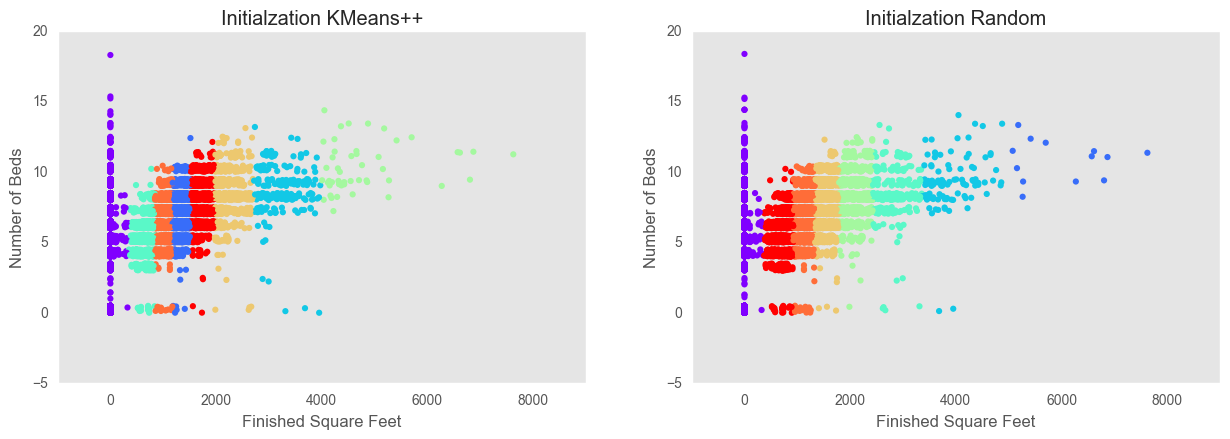

In [19]:
cls_ClustersKMeans = KMeans(n_clusters=groupingCnt, init='k-means++',random_state=1, algorithm =  'elkan')
cls_ClustersKMeans.fit(X1)
newfeature_RoomsKMeans = cls_ClustersKMeans.labels_ # the labels from kmeans clustering


cls_ClustersRandom = KMeans(n_clusters=groupingCnt, init='random',random_state=1, algorithm =  'elkan')
cls_ClustersRandom.fit(X1)
newfeature_RoomsRandom = cls_ClustersRandom.labels_ # the labels from kmeans clustering

#Create Graph
f, ax = plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=newfeature_RoomsKMeans, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.title('Initialzation KMeans++')
plt.xlabel('Finished Square Feet'), plt.ylabel('Number of Beds')
plt.grid()
plt.plot()

plt.subplot(2,2,2)
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=newfeature_RoomsRandom, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.title('Initialzation Random')
plt.xlabel('Finished Square Feet'), plt.ylabel('Number of Beds')
plt.plot()

plt.grid()
plt.show()


## Deployment

The model developed would be used by Zillow in helping provide recommendations for their reality websites.   Since we used the data set from Zillow provided in their Kaggle competition we would provide our model for submission for their review.  We were able to effectively cluster the housing data using finished square feet and number of bedrooms as shown above, in the visualizations.  Clustering instead of recommendation systems means that the search is ultimately relying on the users’ parameters to provide the results for review.  

This clustering would be important not only to Zillow, but also to the those who use their website because when searching for a house, buyers would focus on the number of rooms they need as well as the size of the house they want.  Sellers would use this information to know where their own houses fall into the market in order to determine baseline comparable pricing.   

The model would be implanted through Zillow’s process and we would recommend that Zillow keep their standard continuous updating that they currently use.   The additional data that should be considered with the clustering would be location to help provide a narrower clustering of types of properties within a generalized location for buyers and sellers to focus on.  

## Exceptional Work


## Introduction

    - Brief Intro

## Business Understanding (10 points)

    - Purpose of the data
    - Meaure the effectiveness of a good algorithm
        - how does this make sense for data
        - and how does this make sense for stakeholders
        - why does your chosen validation method make sense for this specific dataset.  
        
## Data Understanding (20 points)

### Part 1 (10 points)

    -  meaning and type of data
     - data quality
         - missing values
         - duplicate data
         - outlies
     - How we deal with these issues  

### Part 2 (10 points)

    - Visualize important attributes
    - Interpretation of all charts and graphs
    - NO Required number
    
## Modeling and Evaluation (50 points)
Details for each of the following subsections differ depending on the option we choose. I will fill in the detail when we pick an option

### Train and adjust parameters (10 points)

### Evaluate and Compare (10 points)

### Visualize Results (10 points)

### Summarize the Ramificaitons (20 points)

## Deployment (10 points)

    - Did we achieve goals
    - How useful is modle for interested parties
    - How would we deploy model
    - What other data should be collected
    - How often should model be updated

## Exceptional Work (10 points)
